<h1 style="color:#008000;font-size:26px">SEER Breast Cancer Data Analysis</h1>

<h3 style="color:#8B0000;">Imported All the necessary libraries:</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Random Forest
from sklearn.ensemble import RandomForestClassifier
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# XGBClassifier 
from xgboost import XGBClassifier
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report


<h3 style="color:#8B0000;"> Read the Data set and store it in a pandas Data Frame:</h3>

In [2]:
df = pd.read_csv("dataset/SEER_Breast_Cancer_2020.csv", delimiter=';')
df.head()

,Age recode with <1 year olds,Year of birth,Sequence number,Year of diagnosis,Primary Site - labeled,Laterality,Reason no cancer-directed surgery,Histology recode - broad groupings,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Survival months,Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),"Breast - Adjusted AJCC 6th Stage (1988-2015),,,,,"
0,60-64 years,1910,One primary only,1975,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,162.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,"
1,35-39 years,1951,One primary only,1990,C50.4-Upper-outer quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,37.0,T1c,N0,M0,"I,,,,,"
2,55-59 years,1934,One primary only,1991,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,26.0,TX Adjusted,NX Adjusted,M0,"UNK Stage,,,,,"
3,60-64 years,1927,One primary only,1989,C50.2-Upper-inner quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,20.0,T2,N1,M0,"IIB,,,,,"
4,70-74 years,1907,One primary only,1982,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,116.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,,"


<h3 style="color:#8B0000;"> Display the column names of the data frame:</h3>

In [3]:
df.columns

Index(['Age recode with <1 year olds', 'Year of birth', 'Sequence number',
       'Year of diagnosis', 'Primary Site - labeled', 'Laterality',
       'Reason no cancer-directed surgery',
       'Histology recode - broad groupings',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'Survival months',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)',
       'Breast - Adjusted AJCC 6th Stage (1988-2015),,,,,'],
      dtype='object')

<h3 style="color:#8B0000;"> 1. Compute the age at time of diagnosis:</h3>

In [ ]:
# Compute the age at the time of diagnosis
df['Age at Diagnosis'] = df['Year of diagnosis'] - df['Year of birth']
df['Age at Diagnosis']

<h3 style="color:#8B0000;"> 2. Compute the age of each patient (given in nominal way in the data set):</h3>

In [4]:
# Compute the age of each patient
age_recode_map = {
    '60-64 years': 62,
    '35-39 years': 37,
    '55-59 years': 57,
    '70-74 years': 72,
    '50-54 years': 52,
    '80-84 years': 82,
    '40-44 years': 42,
    '45-49 years': 47,
    '30-34 years': 32,
    '75-79 years': 77,
    '25-29 years': 27,
    '65-69 years': 67,
    '85+ years': 90,  # Adjusted to 90 for simplicity
    '20-24 years': 22,
    '15-19 years': 17
}
df['Age'] = df['Age recode with <1 year olds'].map(age_recode_map)
df['Age']

0         62
1         37
2         57
3         62
4         72
          ..
172563    82
172564    57
172565    67
172566    82
172567    67
Name: Age, Length: 172568, dtype: int64

<h3 style="color:#8B0000;"> 3. Filter all cases in which the ER and PR status is unknown (Not 1990+ Breast) Recode the column "Laterality" into the following: left, right and two-sided :</h3>

In [5]:
# Filter cases where the ER and PR status is unknown (Not 1990+ Breast)
df_filtered = df[(df['ER Status Recode Breast Cancer (1990+)'] == 'Not 1990+ Breast') &
                 (df['PR Status Recode Breast Cancer (1990+)'] == 'Not 1990+ Breast')]

df_filtered.head()

,Age recode with <1 year olds,Year of birth,Sequence number,Year of diagnosis,Primary Site - labeled,Laterality,Reason no cancer-directed surgery,Histology recode - broad groupings,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Survival months,Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),"Breast - Adjusted AJCC 6th Stage (1988-2015),,,,,",Age
0,60-64 years,1910,One primary only,1975,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,162.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,",62
3,60-64 years,1927,One primary only,1989,C50.2-Upper-inner quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,20.0,T2,N1,M0,"IIB,,,,,",62
4,70-74 years,1907,One primary only,1982,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,116.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,,",72
5,60-64 years,1913,1st of 2 or more primaries,1977,C50.8-Overlapping lesion of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,208.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,,",62
6,50-54 years,1934,1st of 2 or more primaries,1986,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,153.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,",52


<h3 style="color:#8B0000;"> 4.  Recode the column "Laterality" into the following: left, right and two-sided :</h3>

In [12]:
# Recode the column "Laterality" into left, right, and two-sided
laterality_map = {
    'Left - origin of primary': 'left',
    'Right - origin of primary': 'right',
    'Bilateral involvement, lateral origin unknown': 'two-sided'
    # Add mappings for other values if needed
}
df['Laterality Recoded'] = df['Laterality'].map(laterality_map)
df['Laterality Recoded']

0          left
1         right
2          left
3         right
4          left
          ...  
172542      NaN
172543    right
172545    right
172561      NaN
172566     left
Name: Laterality Recoded, Length: 158765, dtype: object

<h3 style="color:#8B0000;"> 5. Filter out cases that are later than 2011:</h3>

- Rule: A patient is labelled as "healed" if there is no cancer detected in the subsequent 5 years

In [13]:
df['Year of diagnosis'].describe()

count    158765.000000
mean       1997.105962
std          10.042873
min        1975.000000
25%        1990.000000
50%        2000.000000
75%        2005.000000
max        2011.000000
Name: Year of diagnosis, dtype: float64

In [7]:
# Filter out cases that are later than 2011
df = df[df['Year of diagnosis'] <= 2011]

<h3 style="color:#8B0000;">6. Classify patients as "healed" or "not healed" :</h3>

In [8]:
# Classify patients as "healed" or "not healed"
df['Healing Status'] = df['Survival months'].apply(lambda x: 'healed' if x > 60 else 'not healed')

In [15]:
# Check the distribution of "healed" and "not healed" patients
healing_status_counts = df['Healing Status'].value_counts()
healing_status_counts

Healing Status
not healed    97881
healed        60884
Name: count, dtype: int64

In [18]:
healing_status_percent = (df['Healing Status'].value_counts()*100)/df.shape[0]
healing_status_percent

Healing Status
not healed    61.651497
healed        38.348503
Name: count, dtype: float64

<h3 style="color:#8B0000;"> 7. Check the distribution of “healed” and “not healed” patients in the data set.</h3>

In [ ]:
# Are the groups unbalanced?
distribution = df['Healing Status'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = distribution['healed'] / distribution['not healed']

# Display the distribution and imbalance ratio
print("Distribution:")
print(distribution)
print("Imbalance Ratio: ", imbalance_ratio)

Based on the distribution you provided, we can see that there are 97881 patients classified as "not healed" and 60884 patients classified as "healed" in the dataset.

To determine if the groups are unbalanced, we can compare the counts of "healed" and "not healed" patients. In this case, the counts are relatively close, with a difference of approximately 2,050 patients. However, to assess the balance more accurately, we can calculate the ratio between the two groups:

Imbalance Ratio = Count of "healed" patients / Count of "not healed" patients

Imbalance Ratio = 60884 / 97881 ≈ 0.6220

The imbalance ratio of approximately 0.6220 suggests that the "healed" group is slightly smaller than the "not healed" group. However, the groups seem slighly imbalanced.

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot showing the count of healed and not healed patients for each year
plt.figure(figsize=(10, 6))
df.groupby(['Year of diagnosis', 'Healing Status']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Year of Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Healing Status by Year of Diagnosis')
plt.legend(loc='upper left')
plt.show()


In [ ]:
yearly_proportions = df.groupby('Year of diagnosis')['Healing Status'].value_counts(normalize=True).unstack()
print(yearly_proportions)


Upsampling or Downsampling: Since the dataset contains a slight imbalance between the "healed" and "not healed" groups, upsampling or downsampling techniques may be worth considering to achieve a better balance. Upsampling involves increasing the number of instances in the minority class (in this case, the "healed" group), while downsampling involves decreasing the number of instances in the majority class (the "not healed" group). These techniques can help address class imbalance issues and improve the performance of machine learning models, especially if the class imbalance has a significant impact on the analysis.

Connection to the Year of Diagnosis: To determine if there is a common pattern in the data related to the year of diagnosis,  we analyzed the distribution of healing status across different years. By examining the bar plot and proportions calculated , we can assess if certain years have a higher proportion of healed or not healed patients. This analysis provides insights into potential relationships between the year of diagnosis and the likelihood of healing.

Interpreting the Connection: As there is a notable connection between the year of diagnosis and the healing status, it may imply that advancements in medical treatments, changes in diagnostic methods, or other factors have influenced the outcomes of cancer patients over time.

Upsampling can be applied, it involves increasing the number of instances in the Minority class (the "healed" group). These techniques can help address class imbalance issues and improve the performance of machine learning models, especially if the class imbalance has a significant impact on the analysis.

<h3 style="color:#8B0000;"> 8. Use only data points that have information in the column "Histology recode":</h3>

In [ ]:
df = df[df['Histology recode - broad groupings'].notnull()]

<h3 style="color:#8B0000;"> 9. Recode "Reason no cancer-directed surgery" into a binary variable:</h3>

In [ ]:
df['Surgery Performed'] = df['Reason no cancer-directed surgery'].apply(
    lambda x: 'surgery performed' if x == 'Surgery performed' else 'surgery not performed'
)

# Display the updated DataFrame
print(df.head())

# Data Mining Problem: CRISP Life Cycle Model
<h3 style="color:#8B0000;">  Predicting the Survival/ Healing status of breast cancer patients based on their demographic information, diagnostic  and treatment details:</h3>



The goal is to build a predictive model that can classify patients into two categories: "healed" and "not healed." The model will utilize the available features such as age recode, year of birth, primary site, laterality, reason for no cancer-directed surgery, histology, ER/PR status, survival months, AJCC 6th stage, age at diagnosis, and surgery performed.

The objective is to use historical data to train a model that can accurately predict whether a breast cancer patient is likely to be healed (no cancer detected in the subsequent 5 years) or not healed.

By solving this data mining problem, we can gain insights into the factors that contribute to the healing status of breast cancer patients. This information can be valuable for healthcare professionals in making treatment decisions, monitoring patient progress, and providing personalized care.

# 10. EDA and Data Preprocessing:

<h3 style="color:#8B0000;"> Display the shape of the data frame:</h3>

In [ ]:
df.shape

<h3 style="color:#8B0000;"> Display the column names in the data frame:</h3>

In [ ]:
df.columns

<h3 style="color:#8B0000;"> Display the data types of each variable:</h3>

In [ ]:
df.dtypes

<h3 style="color:#8B0000;"> Display the general information about the dataset:</h3>

In [ ]:
df.info()

<h3 style="color:#8B0000;"> Check are there any missing values in the dataset:</h3>

In [ ]:
df.isnull().any()

<h3 style="color:#8B0000;"> Count  the number of  missing values in the dataset:</h3>

In [ ]:
df.isnull().sum()

<h3 style="color:#8B0000;"> Replace the previous values with the new values in Primary Site - labeled column :</h3>

In [ ]:
df['Primary Site - labeled'] = df['Primary Site - labeled'].replace(['C50.9-Breast, NOS', 'C50.4-Upper-outer quadrant of breast',
       'C50.2-Upper-inner quadrant of breast',
       'C50.8-Overlapping lesion of breast',
       'C50.5-Lower-outer quadrant of breast',
       'C50.6-Axillary tail of breast', 'C50.1-Central portion of breast',
       'C50.3-Lower-inner quadrant of breast', 'C50.0-Nipple'], 
                                                                    
        ['Breast, NOS', 'Upper-outer quadrant of breast',
       'Upper-inner quadrant of breast',
       'Overlapping lesion of breast',
       'Lower-outer quadrant of breast',
       'Axillary tail of breast', 'Central portion of breast',
       'Lower-inner quadrant of breast', 'Nipple'])

<h3 style="color:#8B0000;"> Display unique values in the column 'Reason no cancer-directed surgery'</h3>

In [ ]:
df['Reason no cancer-directed surgery'].unique()

<h3 style="color:#8B0000;"> Replace the previous values with the new values in Reason no cancer-directed surgery column :</h3>

In [ ]:
df['Reason no cancer-directed surgery'] = df['Reason no cancer-directed surgery'].replace(['Surgery performed',
       'Recommended but not performed, unknown reason', 'Not recommended',
       'Recommended, unknown if performed',
       'Recommended but not performed, patient refused',
       'Not performed, patient died prior to recommended surgery'],
        
        ['Surgery performed',
       'Recommended but not performed', 'Not recommended',
       'Recommended, unknown if performed',
       'patient refused',
       'patient died prior to recommended surgery']
                                               )

<h3 style="color:#8B0000;"> Replace the previous values with the new values in 'Histology recode - broad groupings column :</h3>

In [ ]:
df['Histology recode - broad groupings'] = df['Histology recode - broad groupings'].replace(['8500-8549: ductal and lobular neoplasms',
       '8140-8389: adenomas and adenocarcinomas',
       '8010-8049: epithelial neoplasms, NOS',
       '8440-8499: cystic, mucinous and serous neoplasms',
       '8050-8089: squamous cell neoplasms',
       '8390-8429: adnexal and skin appendage neoplasms',
       '8560-8579: complex epithelial neoplasms',
       '8550-8559: acinar cell neoplasms',
       '8120-8139: transitional cell papillomas and carcinomas'],
    
        ['ductal and lobular neoplasms',
       'adenomas and adenocarcinomas',
       'epithelial neoplasms, NOS',
       'cystic, mucinous and serous neoplasms',
       'squamous cell neoplasms',
       'adnexal and skin appendage neoplasms',
       'complex epithelial neoplasms',
       'acinar cell neoplasms',
       'transitional cell papillomas and carcinomas']
                                               )

<h3 style="color:#8B0000;"> Replace the missing values in the respective columns with mode of each column :</h3>

In [ ]:
df['Breast - Adjusted AJCC 6th T (1988-2015)'] = df['Breast - Adjusted AJCC 6th T (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th T (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th N (1988-2015)'] = df['Breast - Adjusted AJCC 6th N (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th N (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th M (1988-2015)'] = df['Breast - Adjusted AJCC 6th M (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th M (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th Stage (1988-2015)'] = df['Breast - Adjusted AJCC 6th Stage (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th Stage (1988-2015)'].mode()[0])
df['Laterality Recoded'] = df['Laterality Recoded'].fillna(df['Laterality Recoded'].mode()[0])

<h3 style="color:#8B0000;"> Replace the Blank(s) value in the respective columns with mode of each column :</h3>

In [ ]:
df['Breast - Adjusted AJCC 6th T (1988-2015)'] = df['Breast - Adjusted AJCC 6th T (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th T (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th N (1988-2015)'] = df['Breast - Adjusted AJCC 6th N (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th N (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th M (1988-2015)'] = df['Breast - Adjusted AJCC 6th M (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th M (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th Stage (1988-2015)'] = df['Breast - Adjusted AJCC 6th Stage (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th Stage (1988-2015)'].mode()[0])

# Univariate Analysis:

<h3 style="color:#8B0000;">Distribution of Year of birth: </h3>

In [ ]:
# Histogram of 'Year of birth'
plt.figure(figsize = (14, 7))
plt.hist(df['Year of birth'], color = 'brown')
plt.xlabel('Year of birth', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Year of birth', fontsize = 15)
plt.show()

Explanation: This graph shows the distribution of birth years for the patients in the dataset.
Insights: The histogram provides insights into the birth year distribution, which can be helpful in analyzing the age distribution of patients and identifying any trends or patterns over time. It may reveal information about the cohort of patients included in the dataset and their birth year distribution. Most people fall with 1900 and 1980. 

<h3 style="color:#8B0000;"> Bar chart of 'Primary Site - labeled:</h3>

In [ ]:
#  Bar chart of 'Primary Site - labeled'
plt.figure(figsize = (14, 7))
df['Primary Site - labeled'].value_counts().plot(kind='bar', color = 'brown')
plt.xlabel('Primary Site - labeled', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases for each Primary Site', fontsize = 15)
plt.xticks(rotation=90)
plt.show()


Explanation: This bar chart represents the count of cases for each primary site (labeled) category.
Insights: The bar chart helps identify the primary sites with the highest and lowest occurrence of cancer cases. It provides insights into the relative frequencies of different primary sites, allowing for comparisons and highlighting the most common sites. Upper Outer Quadrant Breast has sufferred a lot, where as Nipple has got the least number of cancers.

<h3 style="color:#8B0000;"> Distribution of Survival Months:</h3>

In [ ]:
plt.figure(figsize=(14, 7))
df['Survival months'].plot(kind = 'box')
plt.xlabel('Survival Months', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Survival Months', fontsize = 15)
plt.show()

Explanation: This histogram visualizes the distribution of survival months for the patients in the dataset.
Insights: The histogram provides insights into the survival duration of patients with cancer. It helps identify the frequency of cases across different survival time ranges and may reveal patterns or notable peaks in the data. 

<h3 style="color:#8B0000;"> Pie chart  to show the Distribution of Laterality Recoded:</h3>

In [ ]:
plt.figure(figsize=(14, 7))
labels = df['Laterality Recoded'].value_counts().index
sizes = df['Laterality Recoded'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Laterality Recoded', fontsize = 15)
plt.show()

Explanation: This pie chart represents the proportion of cases for each laterality recoded category.
Insights: The pie chart offers a visual representation of the relative frequencies of different laterality recoded categories. It allows for a quick assessment of the distribution and comparison between different laterality groups.
 It can be seen that 51.2% cancers has appeared in Left breast whereas 48.8% breast cancers has appeared in right side. 

<h3 style="color:#8B0000;"> Line plot of 'Year of diagnosis:</h3>

In [ ]:
# Line plot of 'Year of diagnosis'
plt.figure(figsize=(14, 7))
year_counts = df['Year of diagnosis'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year of Diagnosis', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Number of Cancer Cases by Year of Diagnosis', fontsize = 15)
plt.xticks(rotation=45)
plt.show()

Explanation: This line plot displays the count of cases over time based on the year of diagnosis.
Insights: The line plot helps identify trends and patterns in the number of cancer cases diagnosed over the years. It allows for the detection of any significant changes, increasing or decreasing trends, or possible seasonality in cancer diagnoses. As we can see there is a sudden increase in the frequency from the year 2000, it may be due to the  advancements in medical treatments, changes in diagnostic methods, or other factors have influenced the outcomes of cancer patients over time.

<h3 style="color:#8B0000;"> A bar graph to show the Count of Cases for each PR Status:</h3>

In [ ]:
plt.figure(figsize=(14, 7))
df['PR Status Recode Breast Cancer (1990+)'].value_counts().plot(kind='bar', color = ['brown','gray','black','blue'])
plt.xlabel('PR Status Recode Breast Cancer (1990+)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases for each PR Status', fontsize = 15)
plt.show()

Explanation:

- This code generates a bar graph showing the count of cases for each PR status category.
- The figure size of the plot is set to (14, 7) inches.
- The value_counts() function counts the occurrences of each PR status category in the DataFrame column.
- The plot() function with kind='bar' creates a bar graph to visualize the counts.
- The color parameter assigns different colors to each PR status category.
- The x-axis label is set to 'PR Status Recode Breast Cancer (1990+)' with a font size of 15.
- The y-axis label is set to 'Count' with a font size of 15.
- The title of the graph is 'Count of Cases for each PR Status' with a font size of 15.
- Finally, the plot is displayed using plt.show().


Insights:

The bar graph provides a visual representation of the distribution of cases across different PR status categories.
The height of each bar represents the count of cases for the corresponding PR status.
By analyzing the graph, you can observe the relative frequencies of different PR status categories and identify any imbalances or patterns in the data.
The color differentiation helps to distinguish between different PR status categories easily.

<h3 style="color:#8B0000;"> A bar graph to show the Count of Cases for each ER Status:</h3>

In [ ]:
plt.figure(figsize=(14, 7))
df['ER Status Recode Breast Cancer (1990+)'].value_counts().plot(kind='bar',color = ['brown','gray','black','pink'])
plt.xlabel('ER Status Recode Breast Cancer (1990+)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases for each ER Status', fontsize = 15)
plt.show()

Explanation:

- This code generates a bar graph showing the count of cases for each ER status category.
- The figure size of the plot is set to (14, 7) inches.
- The value_counts() function counts the occurrences of each ER status category in the DataFrame column.
- The plot() function with kind='bar' creates a bar graph to visualize the counts.
- The color parameter assigns different colors to each ER status category.
- The x-axis label is set to 'ER Status Recode Breast Cancer (1990+)' with a font size of 15.
-The y-axis label is set to 'Count' with a font size of 15.
-The title of the graph is 'Count of Cases for each ER Status' with a font size of 15.
-Finally, the plot is displayed using plt.show().

Insights:

The bar graph provides a visual representation of the distribution of cases across different ER status categories.
The height of each bar represents the count of cases for the corresponding ER status.
By analyzing the graph, you can observe the relative frequencies of different ER status categories and identify any imbalances or patterns in the data.
The color differentiation helps to distinguish between different ER status categories easily.

<h3 style="color:#8B0000;"> Count of Cases for each Healing Status (Response Variable):</h3>

In [ ]:
plt.figure(figsize=(14, 7))
df['Healing Status'].value_counts().plot(kind='bar',color = ['brown','green',])
plt.xlabel('Healing Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases for each Healing Status', fontsize = 15)
plt.show()

Based on the distribution you provided, we can see that there are 97881 patients classified as "not healed" and 60884 patients classified as "healed" in the dataset. We have a class imbalance. 

# Multivariate Analysis:

<h3 style="color:#8B0000;"> Scatter Plot (Age vs. Survival Months with Hue):</h3>

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Age', y='Survival months', hue='Healing Status', data=df)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Survival Months', fontsize=12)
plt.title('Age vs. Survival Months (with Healing Status)', fontsize=14)
plt.show()


Explanation:

- This scatter plot visualizes the relationship between age and survival months, with the points colored based on the healing status.
- The sns.scatterplot() function from the Seaborn library is used to create the scatter plot.
- The x parameter is set to 'Age', indicating the variable to be plotted on the x-axis.
- The y parameter is set to 'Survival months', indicating the variable to be plotted on the y-axis.
- The hue parameter is set to 'Healing Status', which assigns different colors to points based on the healing status.
- The data for the plot is provided through the data parameter, which is set to the DataFrame df.
- The x-axis label is set to 'Age' with a font size of 12.
- The y-axis label is set to 'Survival Months' with a font size of 12.
- The title of the plot is 'Age vs. Survival Months (with Healing Status)' with a font size of 14.
- Finally, the plot is displayed using plt.show().

Insights:

This scatter plot allows us to examine the relationship between age and survival months, while considering the healing status as well.
The points are color-coded based on whether the case is healed or not healed.
We can observe patterns or trends in the data, such as clusters or associations between age, survival months, and healing status.
This plot helps identify any potential correlations between age, survival months, and the likelihood of healing.


<h3 style="color:#8B0000;"> Box Plot (Healing Status vs. Survival Months):</h3>

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Healing Status', y='Survival months', data=df)
plt.xlabel('Healing Status', fontsize=12)
plt.ylabel('Survival Months', fontsize=12)
plt.title('Healing Status vs. Survival Months', fontsize=14)
plt.show()

Explanation:

- This box plot compares the distribution of survival months between different healing statuses.
- The sns.boxplot() function is used to create the plot.
- The x parameter is set to 'Healing Status', indicating the variable to be plotted on the x-axis.
- The y parameter is set to 'Survival months', indicating the variable to be plotted on the y-axis.
- The data for the plot is provided through the data parameter, which is set to the DataFrame df.
- The x-axis label is set to 'Healing Status' with a font size of 12.
- The y-axis label is set to 'Survival Months' with a font size of 12.
- The title of the plot is 'Healing Status vs. Survival Months' with a font size of 14.
- Finally, the plot is displayed using plt.show().

Insights:

The box plot allows us to compare the distribution of survival months for different healing statuses.
We can observe differences in the central tendency, spread, and presence of outliers for each healing status.
This plot helps identify any variations in survival months based on the healing status and provides insights into potential differences in patient outcomes.
Note:
These are just two examples of multivariate analysis using different types of graphs. You can explore other types of plots, combinations of variables, or customize these plots further based on your specific requirements and dataset.


<h3 style="color:#8B0000;">Violin plot to show Healing Status vs. Age (with Laterality):</h3>

In [ ]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Healing Status', y='Age', hue='Laterality Recoded', data=df)
plt.xlabel('Healing Status', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Healing Status vs. Age (with Laterality)', fontsize=14)
plt.show()


Explanation:

This violin plot visualizes the distribution of age for different healing statuses, with the hue representing the laterality.
- The sns.violinplot() function from the Seaborn library is used to create the plot.
- The x parameter is set to 'Healing Status', indicating the variable to be plotted on the x-axis.
- The y parameter is set to 'Age', indicating the variable to be plotted on the y-axis.
- The hue parameter is set to 'Laterality', which assigns different colors to the violins based on the laterality.
- The data for the plot is provided through the data parameter, which is set to the DataFrame df.
- The x-axis label is set to 'Healing Status' with a font size of 12.
- The y-axis label is set to 'Age' with a font size of 12.
- The title of the plot is 'Healing Status vs. Age (with Laterality)' with a font size of 14.
- Finally, the plot is displayed using plt.show().

Insights:

This violin plot allows us to compare the distribution of age for different healing statuses, while considering the laterality as well.
The violins provide information about the distribution, including the median, quartiles, and density of the data.
We can observe differences in age distribution among healing statuses, as well as variations based on laterality.
This plot helps identify any potential relationships between age, healing status, and laterality.

<h3 style="color:#8B0000;"> Scatter plot for Age at Diagnosis vs. Survival Months:</h3>

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(df['Age at Diagnosis'], df['Survival months'])
plt.xlabel('Age at Diagnosis', fontsize = 15)
plt.ylabel('Survival Months', fontsize = 15)
plt.title('Age at Diagnosis vs. Survival Months', fontsize = 15)
plt.show()

Explanation:

- The scatter plot visualizes the relationship between the age at diagnosis and survival months.
- The plt.scatter() function is used to create the scatter plot.
- The x-axis represents the age at diagnosis, which is obtained from the 'Age at Diagnosis' column in the DataFrame df.
- The y-axis represents the survival months, which is obtained from the 'Survival months' column in df.
- The plot is displayed with a figure size of 14x7 inches using plt.figure(figsize=(14, 7)).
- The x-axis label is set to 'Age at Diagnosis' with a font size of 15 using plt.xlabel('Age at Diagnosis', fontsize=15).
- The y-axis label is set to 'Survival Months' with a font size of 15 using plt.ylabel('Survival Months', fontsize=15).
- The title of the plot is 'Age at Diagnosis vs. Survival Months' with a font size of 15 using plt.title('Age at Diagnosis vs. Survival Months', fontsize=15).
- Finally, the plot is displayed using plt.show().

Insights:

The scatter plot allows us to observe the relationship between the age at diagnosis and the survival months for breast cancer patients.
Each point in the plot represents an individual case, with the x-coordinate indicating the age at diagnosis and the y-coordinate indicating the corresponding survival months.
By examining the scatter plot, we can identify any potential patterns or trends between age at diagnosis and survival months.
We can look for any clusters or concentrations of points that may suggest a relationship between age and survival.
Additionally, the scatter plot helps us identify any outliers or unusual cases that deviate from the general pattern.
This plot can be useful for understanding the general relationship between age at diagnosis and survival months in the dataset and can potentially provide insights for further analysis or investigation.

<h3 style="color:#8B0000;"> Drop the unnecesary Columns from the data frame :</h3>

In [ ]:
df.drop(['Age recode with <1 year olds','Laterality','Reason no cancer-directed surgery','Survival months','Histology recode - broad groupings',], axis = 1, inplace = True)

<h3 style="color:#8B0000;"> Print the columns having object data type :</h3>

In [ ]:
df.select_dtypes(include = 'object').columns

<h3 style="color:#8B0000;"> Assign numeric codes to the values of Laterality Recoded and Surgery Performed codes:</h3>

In [ ]:
df['Laterality Recoded'] = df['Laterality Recoded'].astype('category').cat.codes
df['Surgery Performed'] = df['Surgery Performed'].astype('category').cat.codes

<h3 style="color:#8B0000;"> Get dummies variables for all the other remaining category type variables :</h3>

In [ ]:
df_dummy = pd.get_dummies(df, columns = ['Sequence number', 'Primary Site - labeled',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)',
       'Breast - Adjusted AJCC 6th Stage (1988-2015)', ])
df_dummy.head()


<h3 style="color:#8B0000;"> Store Features into 'X' matrix and Response into 'y' vector:</h3>

In [ ]:
X = df_dummy.loc[:, df_dummy.columns != 'Healing Status']

y = df_dummy['Healing Status']

## Feature Selection using SelectKbest Analysis:
<h3 style="color:#8B0000;">import SelectKBest and f_classif from sklear for feature seletion: </h3>

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

<h3 style="color:#8B0000;"> Initialized SelectKBest with f_classif test and k= 30 </h3>

In [ ]:
test = SelectKBest(score_func=f_classif, k=30)

<h3 style="color:#8B0000;"> Fit the SelectKBest  model: </h3>

In [ ]:
fit = test.fit(X, y)

<h3 style="color:#8B0000;">Transform the features:</h3>

In [ ]:
filtered_features= fit.transform(X)

<h3 style="color:#8B0000;">Show the supporting variables given by SelectKBest (True/false):</h3>

In [ ]:
test.get_support()


<h3 style="color:#8B0000;">Display the scores of the features assigned by the SelectkBest:</h3>

In [ ]:
test.scores_

<h3 style="color:#8B0000;">Find the Feature importance for each feature:</h3>

In [ ]:
feat_importances = pd.Series(test.scores_, index=X.columns)


<h3 style="color:#8B0000;">Display the feature importance using a bar chart:</h3>

In [ ]:
feat_importances.nlargest(15).plot(kind='barh',figsize = (12,7))
plt.show()

<h3 style="color:#8B0000;">Getting the column names:</h3>

In [ ]:
column_names = X.columns[test.get_support()]
column_names


<h3 style="color:#8B0000;">Selecting the  relevant columns given by SelectKbest only: </h3>

In [ ]:
X_Selectkbest = X[column_names]
X_Selectkbest.head()

# Handle Class Imbalance:


<h3 style="color:#8B0000;"> Use SMOTE for Over Sampling to have equal number intances for Survival/ Headled (yes/no):</h3>

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 42)
X_res, y = oversample.fit_resample(X_Selectkbest, y)


<h3 style="color:#8B0000;"> SHow we have equal number of instances after SMOTE:</h3>

In [ ]:
from collections import Counter
counter = Counter(y)
print(counter)


<h3 style="color:#8B0000;">11. Divide the dataset into training set and testing set (80 percent train and 20 percent test):  </h3>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y, test_size=0.20, random_state=0)  


<h3 style="color:#8B0000;"> Scaled the dataset using StandardScaler:  </h3>

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



<h1 style="color:#008000;font-size:30px">Random Forest Classifier:</h1>


<h3 style="color:#8B0000;"> Initialize the Random Forest Model : </h3>

In [ ]:
RF_classifier =  RandomForestClassifier(n_estimators = 100, random_state = 42)


<h3 style="color:#8B0000;"> Fit the random forest model on training set: </h3>

In [ ]:
RF_classifier.fit(X_train_scaled, y_train)

y_pred_rf = RF_classifier.predict(X_test_scaled)


<h3 style="color:#8B0000;"> Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report): </h3>

In [ ]:
accu_rf = accuracy_score(y_pred_rf, y_test)

# Print the prediction accuracy
print('Test Accuracy Random Forest Classifier :', accu_rf)

print('Confuion Matrix Random Forest Classifier :\n', confusion_matrix(y_pred_rf, y_test))

print('Classification Report Random Forest Classifier :', classification_report(y_pred_rf, y_test))



<h1 style="color:#008000;font-size:30px">K-Nearest Neighbour CLassifier:</h1>


<h3 style="color:#8B0000;"> Initialize the K-Nearest Neighbour CLassifier : </h3>

In [ ]:
Knn_classifier = KNeighborsClassifier(n_neighbors=5, )


<h3 style="color:#8B0000;"> Fit the K-Nearest Neighbour CLassifier on training set: </h3>

In [ ]:
Knn_classifier.fit(X_train_scaled, y_train)

y_pred_knn = Knn_classifier.predict(X_test_scaled)


<h3 style="color:#8B0000;"> Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report): </h3>

In [ ]:
accu_knn = accuracy_score(y_pred_knn, y_test)

print('Test accuracy K-nearest Neighbour Classifier :', accu_knn)

print('Confuion Matrix K-nearest Neighbour Classifier :\n', confusion_matrix(y_pred_knn, y_test))

print('Classification Report K-nearest Neighbour Classifier :', classification_report(y_pred_knn, y_test))

<h1 style="color:#008000;font-size:30px">Gradient Boosting Classifier:</h1>


<h3 style="color:#8B0000;"> Initialize the Gradient Boosting Classifier : </h3>

In [ ]:
GBC_classifier = GradientBoostingClassifier(n_estimators=200)


<h3 style="color:#8B0000;"> Fit the Gradient Boosting Classifier model on training set: </h3>

In [ ]:
GBC_classifier.fit(X_train_scaled, pd.Series(y_train).astype('category').cat.codes)

y_pred_GBC = GBC_classifier.predict(X_test_scaled)


<h3 style="color:#8B0000;"> Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report): </h3>

In [ ]:
accu_GBC = accuracy_score(y_pred_GBC, pd.Series(y_test).astype('category').cat.codes)

# Print the prediction accuracy
print('Test Accuracy GBC Classifier :', accu_GBC)

print('Confuion Matrix GBC Classifier :\n', confusion_matrix(y_pred_GBC,  pd.Series(y_test).astype('category').cat.codes))

print('Classification Report GBC Classifier :', classification_report(y_pred_GBC, pd.Series(y_test).astype('category').cat.codes))

<h1 style="color:#008000;font-size:30px">XGB Classifier:</h1>


<h3 style="color:#8B0000;"> Initialize the XGB Classifier Model : </h3>

In [ ]:
XGB_classifier = XGBClassifier()


<h3 style="color:#8B0000;"> Fit the XGB Classifier on training set: </h3>

In [ ]:
XGB_classifier.fit(X_train_scaled, pd.Series(y_train).astype('category').cat.codes)

y_pred_XGB = XGB_classifier.predict(X_test_scaled)


<h3 style="color:#8B0000;"> Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report): </h3>

In [ ]:
accu_XGB = accuracy_score(y_pred_XGB, pd.Series(y_test).astype('category').cat.codes)

# Print the prediction accuracy
print('Test Accuracy XGB Classifier :', accu_XGB)

print('Confuion Matrix XGB Classifier :\n', confusion_matrix(y_pred_XGB, pd.Series(y_test).astype('category').cat.codes))

print('Classification Report XGB Classifier :', classification_report(y_pred_XGB, pd.Series(y_test).astype('category').cat.codes))

<h1 style="color:#008000;font-size:30px">AdaBoost Classifier:</h1>


<h3 style="color:#8B0000;"> Initialize the AdaBoost Classifier Model : </h3>

In [ ]:
ADC_classifier = AdaBoostClassifier(n_estimators= 5)


<h3 style="color:#8B0000;"> Fit the AdaBoost Classifie model on training set: </h3>

In [ ]:
ADC_classifier.fit(X_train_scaled, pd.Series(y_train).astype('category').cat.codes)

y_pred_ADC = ADC_classifier.predict(X_test_scaled)


<h3 style="color:#8B0000;"> Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report): </h3>

In [ ]:
accu_ADC = accuracy_score(y_pred_ADC, pd.Series(y_test).astype('category').cat.codes)

# Print the prediction accuracy
print('Test Accuracy ADC Classifier :', accu_ADC)

print('Confuion Matrix ADC Classifier :\n', confusion_matrix(y_pred_ADC, pd.Series(y_test).astype('category').cat.codes))

print('Classification Report ADC Classifier :', classification_report(y_pred_ADC, pd.Series(y_test).astype('category').cat.codes))

<h1 style="color:#008000;font-size:35px">Model Performance Comparisions:</h1>

  <h3 style="color:#8B0000;">Horizontol Bar graph to Compare all Models With Default Parameters: </h3>
 XGB Classifier is outclassing all the other models with accuracy of 73% with default paramters.


<h3 style="color:#8B0000;"> Make two  lists for the accuracies and models names </h3>

In [ ]:
Default_Accuracies = pd.Series([accu_rf, accu_knn, accu_GBC, accu_XGB, accu_ADC, ])
Model_Names = ['RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier','XGBClassifier', 'AdaBoostClassifier']


<h3 style="color:#8B0000;"> Comparision of Models With Default Parameters( In terms of Accuracy: </h3>

In [ ]:
ax = Default_Accuracies.plot(kind = 'barh',figsize=(15,9),color=['black','gray','green','brown','pink','yellow','blue','red'])
ax.set_title('Comparision of Models With Default Parameters( In terms of Accuracy)',fontsize=15)
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels(Model_Names,fontsize=15,)
ax.set_ylabel("Models",fontsize=15)
ax.set_xlabel("Accuracy",fontsize=15)
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(Default_Accuracies)];
plt.show()




We trained five different classification models: RandomForestClassifier, KNeighborsClassifier, GradientBoostingClassifier, XGBClassifier, and AdaBoostClassifier.

The accuracies of the models are as follows:
- RandomForestClassifier: 0.710074
- KNeighborsClassifier: 0.699976
- GradientBoostingClassifier: 0.726398
- XGBClassifier: 0.731682
- AdaBoostClassifier: 0.690951

The accuracy represents the proportion of correctly predicted instances in the test data.
The models with higher accuracy values indicate better performance in predicting the healing status.
Based on the accuracy values, the XGBClassifier achieved the highest accuracy of 0.731682, followed closely by the GradientBoostingClassifier with an accuracy of 0.726398.
The RandomForestClassifier, KNeighborsClassifier, and AdaBoostClassifier achieved slightly lower accuracies but still performed reasonably well.


It's important to note that accuracy alone might not provide a complete picture of model performance, and other evaluation metrics should be considered as well (e.g., precision, recall, F1-score) to assess the models' overall performance and suitability for the specific task.
In summary, the EDA helped us understand the data distribution and identify patterns, outliers, and relationships between variables. The multivariate analysis provided insights into the associations between different variables and the healing status. The model results showed the accuracy of each model in predicting the healing status, with the XGBClassifier and GradientBoostingClassifier performing the best among the models considered.







In [19]:
df.head()

,Age recode with <1 year olds,Year of birth,Sequence number,Year of diagnosis,Primary Site - labeled,Laterality,Reason no cancer-directed surgery,Histology recode - broad groupings,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Survival months,Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),"Breast - Adjusted AJCC 6th Stage (1988-2015),,,,,",Age,Laterality Recoded,Healing Status
0,60-64 years,1910,One primary only,1975,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,162.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,",62,left,healed
1,35-39 years,1951,One primary only,1990,C50.4-Upper-outer quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,37.0,T1c,N0,M0,"I,,,,,",37,right,not healed
2,55-59 years,1934,One primary only,1991,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,26.0,TX Adjusted,NX Adjusted,M0,"UNK Stage,,,,,",57,left,not healed
3,60-64 years,1927,One primary only,1989,C50.2-Upper-inner quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,20.0,T2,N1,M0,"IIB,,,,,",62,right,not healed
4,70-74 years,1907,One primary only,1982,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,116.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,,",72,left,healed


In [22]:
# Example DataFrame (replace with your actual data)

data=df.copy()
# Map 'Healing Status' to event status
data['event status'] = df['Healing Status'].apply(lambda x: 1 if x == 'not healed' else 0)

# Verify the new column
print(data[['Survival months', 'Healing Status', 'event status']])


        Survival months Healing Status  event status
0                 162.0         healed             0
1                  37.0     not healed             1
2                  26.0     not healed             1
3                  20.0     not healed             1
4                 116.0         healed             0
...                 ...            ...           ...
172542             77.0         healed             0
172543            120.0         healed             0
172545            151.0         healed             0
172561             69.0         healed             0
172566            178.0         healed             0

[158765 rows x 3 columns]


In [24]:
pip install lifelines matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=f720d72a121975df25cde016ec4de258db28abd46d5a378cefb66a6037c12a57
  Stored in directory: c:\users\sash\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [25]:
from lifelines import KaplanMeierFitter

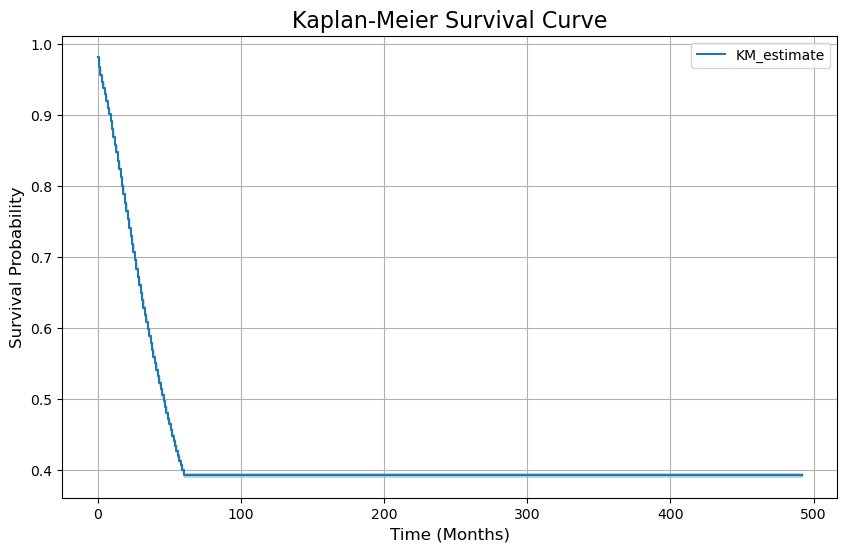

In [43]:
# Kaplan-Meier Fitting
kmf = KaplanMeierFitter()

# Fit the data
time = data_cleaned['Survival months']  # Time to event
event = data_cleaned['event status']    # Event occurred (1 = Event, 0 = Censored)

kmf.fit(time, event_observed=event)

# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function(ci_show=True)
plt.title('Kaplan-Meier Survival Curve', fontsize=16)
plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.grid(True)
plt.show()

In [27]:
print(data[pd.isnull(data['Survival months']) | pd.isnull(data['event status'])])

       Age recode with <1 year olds  Year of birth   Sequence number  \
186                     60-64 years           1916  One primary only   
802                     50-54 years           1929  One primary only   
6794                    80-84 years           1907  One primary only   
7281                      85+ years           1897  One primary only   
8800                    80-84 years           1906  One primary only   
...                             ...            ...               ...   
171177                  60-64 years           1946  One primary only   
171180                  70-74 years           1936  One primary only   
171263                  75-79 years           1935  One primary only   
172420                  50-54 years           1950  One primary only   
172528                  75-79 years           1933  One primary only   

        Year of diagnosis                Primary Site - labeled  \
186                  1981  C50.2-Upper-inner quadrant of breast   
8

In [28]:
data.head()

,Age recode with <1 year olds,Year of birth,Sequence number,Year of diagnosis,Primary Site - labeled,Laterality,Reason no cancer-directed surgery,Histology recode - broad groupings,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Survival months,Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),"Breast - Adjusted AJCC 6th Stage (1988-2015),,,,,",Age,Laterality Recoded,Healing Status,event status
0,60-64 years,1910,One primary only,1975,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,162.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,",62,left,healed,0
1,35-39 years,1951,One primary only,1990,C50.4-Upper-outer quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,37.0,T1c,N0,M0,"I,,,,,",37,right,not healed,1
2,55-59 years,1934,One primary only,1991,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,26.0,TX Adjusted,NX Adjusted,M0,"UNK Stage,,,,,",57,left,not healed,1
3,60-64 years,1927,One primary only,1989,C50.2-Upper-inner quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,20.0,T2,N1,M0,"IIB,,,,,",62,right,not healed,1
4,70-74 years,1907,One primary only,1982,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,116.0,Blank(s),Blank(s),Blank(s),"Blank(s),,,,,",72,left,healed,0


In [33]:
# Count the number of null values in 'Survival months'
num_nulls = data['Survival months'].isnull().sum()

print(f"Number of null values in 'Survival months': {num_nulls}")

Number of null values in 'Survival months': 2314


In [34]:
data.describe()

,Year of birth,Year of diagnosis,Survival months,Age,event status
count,158765.000000,158765.000000,156451.000000,158765.000000,158765.000000
mean,1936.598967,1997.105962,64.301609,60.055069,0.616515
std,17.260809,10.042873,61.920120,15.060672,0.486236
min,1874.000000,1975.000000,0.000000,17.000000,0.000000
25%,1924.000000,1990.000000,21.000000,47.000000,0.000000
50%,1937.000000,2000.000000,46.000000,57.000000,1.000000
75%,1950.000000,2005.000000,88.000000,72.000000,1.000000
max,1991.000000,2011.000000,492.000000,90.000000,1.000000


In [35]:
# Count null values in each column
null_counts = data.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Age recode with <1 year olds                            0
Year of birth                                           0
Sequence number                                         0
Year of diagnosis                                       0
Primary Site - labeled                                  0
Laterality                                              0
Reason no cancer-directed surgery                       0
Histology recode - broad groupings                   2314
ER Status Recode Breast Cancer (1990+)               2314
PR Status Recode Breast Cancer (1990+)               2314
Survival months                                      2314
Breast - Adjusted AJCC 6th T (1988-2015)             2320
Breast - Adjusted AJCC 6th N (1988-2015)             2320
Breast - Adjusted AJCC 6th M (1988-2015)             2320
Breast - Adjusted AJCC 6th Stage (1988-2015),,,,,       0
Age                                                     0
Laterality Recoded                

In [39]:
# Drop columns where any value is null
data_cleaned = data.dropna()

print("Data after dropping columns with null values:")
print(data_cleaned)

# Verify the remaining columns
print(f"Original dataset columns: {data.columns}")
print(f"Cleaned dataset columns: {data_cleaned.columns}")

Data after dropping columns with null values:
       Age recode with <1 year olds  Year of birth   Sequence number  \
0                       60-64 years           1910  One primary only   
1                       35-39 years           1951  One primary only   
2                       55-59 years           1934  One primary only   
3                       60-64 years           1927  One primary only   
4                       70-74 years           1907  One primary only   
...                             ...            ...               ...   
172538                  65-69 years           1943  One primary only   
172540                  80-84 years           1917  One primary only   
172543                  50-54 years           1951  One primary only   
172545                  60-64 years           1940  One primary only   
172566                  80-84 years           1918  One primary only   

        Year of diagnosis                Primary Site - labeled  \
0                    1

In [40]:
# Count null values in each column
null_counts = data_cleaned.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Age recode with <1 year olds                         0
Year of birth                                        0
Sequence number                                      0
Year of diagnosis                                    0
Primary Site - labeled                               0
Laterality                                           0
Reason no cancer-directed surgery                    0
Histology recode - broad groupings                   0
ER Status Recode Breast Cancer (1990+)               0
PR Status Recode Breast Cancer (1990+)               0
Survival months                                      0
Breast - Adjusted AJCC 6th T (1988-2015)             0
Breast - Adjusted AJCC 6th N (1988-2015)             0
Breast - Adjusted AJCC 6th M (1988-2015)             0
Breast - Adjusted AJCC 6th Stage (1988-2015),,,,,    0
Age                                                  0
Laterality Recoded                                   0
Healing Status             

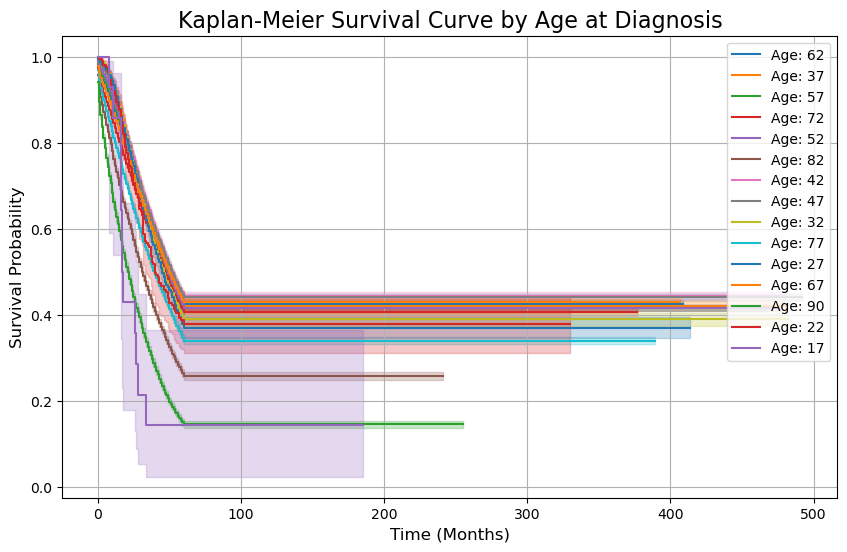

In [46]:
# Stratify by a categorical feature (e.g., Age at Diagnosis)
groups = data_cleaned['Age'].unique()  # Unique categories

plt.figure(figsize=(10, 6))

# Loop through each group and fit the Kaplan-Meier curve
for group in groups:
    group_data = data_cleaned[data_cleaned['Age'] == group]
    time = group_data['Survival months']
    event = group_data['event status']
    
    # Fit the model for the group
    kmf.fit(time, event_observed=event, label=f'Age: {group}')
    kmf.plot_survival_function()

# Add plot details
plt.title('Kaplan-Meier Survival Curve by Age at Diagnosis', fontsize=16)
plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [49]:
groups2 = data_cleaned['Primary Site - labeled'].unique()
groups2

array(['C50.9-Breast, NOS', 'C50.4-Upper-outer quadrant of breast',
       'C50.2-Upper-inner quadrant of breast',
       'C50.8-Overlapping lesion of breast',
       'C50.5-Lower-outer quadrant of breast',
       'C50.6-Axillary tail of breast', 'C50.1-Central portion of breast',
       'C50.3-Lower-inner quadrant of breast', 'C50.0-Nipple'],
      dtype=object)

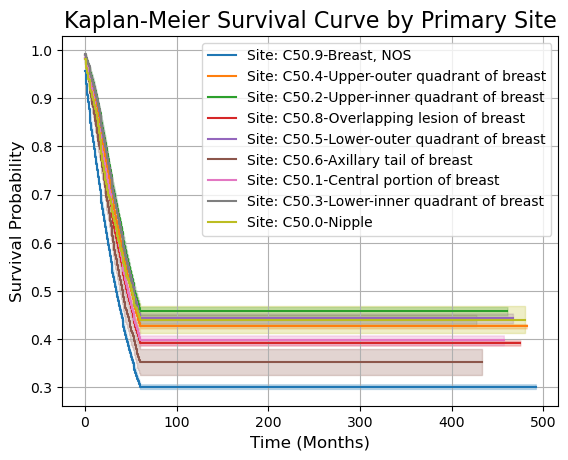

In [51]:
# Loop through each group and fit the Kaplan-Meier curve
for group2 in groups2:
    group_data2 = data_cleaned[data_cleaned['Primary Site - labeled'] == group2]
    time = group_data2['Survival months']
    event = group_data2['event status']
    
    # Fit the model for the group
    kmf.fit(time, event_observed=event, label=f'Site: {group2}')
    kmf.plot_survival_function()

# Add plot details
plt.title('Kaplan-Meier Survival Curve by Primary Site', fontsize=16)
plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [54]:
groups3 = data_cleaned['ER Status Recode Breast Cancer (1990+)'].unique()
groups3

array(['Not 1990+ Breast', 'Positive', 'Negative', 'Unknown',
       'Borderline'], dtype=object)

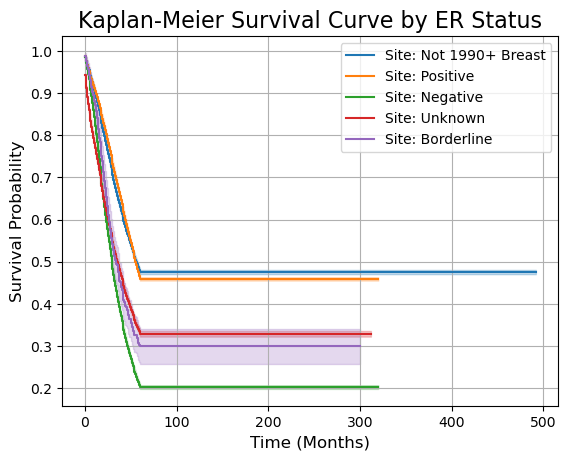

In [55]:
# Loop through each group and fit the Kaplan-Meier curve
for group3 in groups3:
    group_data3 = data_cleaned[data_cleaned['ER Status Recode Breast Cancer (1990+)'] == group3]
    time = group_data3['Survival months']
    event = group_data3['event status']
    
    # Fit the model for the group
    kmf.fit(time, event_observed=event, label=f'Site: {group3}')
    kmf.plot_survival_function()

# Add plot details
plt.title('Kaplan-Meier Survival Curve by ER Status', fontsize=16)
plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [56]:
groups4 = data_cleaned['PR Status Recode Breast Cancer (1990+)'].unique()
groups4

array(['Not 1990+ Breast', 'Positive', 'Negative', 'Unknown',
       'Borderline'], dtype=object)

In [65]:
data_cleaned['PR Status Recode Breast Cancer (1990+)']

0         Not 1990+ Breast
1                 Positive
2                 Positive
3         Not 1990+ Breast
4         Not 1990+ Breast
                ...       
172538            Positive
172540            Positive
172543            Positive
172545             Unknown
172566            Negative
Name: PR Status Recode Breast Cancer (1990+), Length: 154163, dtype: object

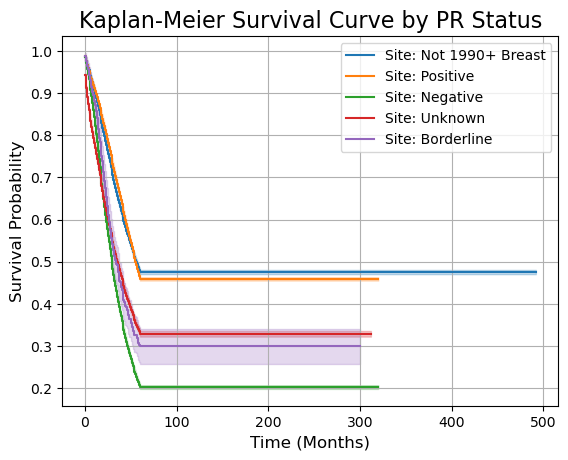

In [67]:
# Loop through each group and fit the Kaplan-Meier curve
for group4 in groups4:
    group_data4 = data_cleaned[data_cleaned['ER Status Recode Breast Cancer (1990+)'] == group4]
    time = group_data4['Survival months']
    event = group_data4['event status']
    
    # Fit the model for the group
    kmf.fit(time, event_observed=event, label=f'Site: {group4}')
    kmf.plot_survival_function()

# Add plot details
plt.title('Kaplan-Meier Survival Curve by PR Status', fontsize=16)
plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()